# **Otimização por Colônia de Formigas**
> A Otimização por Colônia de Formigas, *Ant Colony Optimization* - ACO, é uma técnica inspirada na busca por fonte de alimento realizada por colônias de formigas, a qual é aplicada a problemas discretos de otimização.

> A metáfora central da ACO reside no mecanismo de comunicação indireta através de sinais químicos (feromônios), empregado por muitas espécies de formigas sociais, na busca por fontes de alimentos. As formigas buscam aleatoriamente por fontes de alimento próximas aos seus ninhos, sendo que a “força” da trilha de feromônio cresce rapidamente para fontes próximas e para trilhas mais curtas. As trilhas surgem ao longo do tempo, como uma memória coletiva, formando uma rota entre a colônia e a fonte de alimento (Figura 1).

Figura 1. Depósito de feromônio entre o ninho (N) e a fonte de alimento (F)

<img src="https://drive.google.com/uc?id=1oCFZzpApf-ctuWxZ_ZiqmcinVMr3UvDC" width="500">

> O presente notebook colab pretende introduzir à ACO. A codificação foi baseada na biblioteca ACO-Pants e nos exemplos disponíveis em {1}. 
>* Abaixo podemos visualizar a importação dos pacotes e módulos necessários. 
---
{1} ACO-Pants. A Python3 implementation of the Ant Colony Optimization Meta-Heuristic. Disponível em: https://pypi.org/project/ACO-Pants/. Acesso em: 5 abr 2021.

#**Seleção e Formulação do Problema** 
> O primeiro passo para utilizar a ACO é mapear o problema selecionado para um grafo no qual a rota (trilha mais forte de feromônios) representa a solução do problema. A tarefa é encontrar um caminho ótimo através do grafo.

> Dessa forma, nada mais natural do que escolher o clássico **Problema do Caixeiro Viajante**. O **Problema do Caixeiro Viajante**, ou *Travelling Salesman Problem*, reside no objetivo de encontrar a menor rota possível para visitar um conjunto de cidades, passando por cada uma delas uma única vez, e retornar à origem.
* O espaço de estados para esse problema pode ser representado por um grafo completamente conexo. Os vértices são as cidades e as arestas representam vias entre cidades, havendo uma distância (custo) associada.
* O trecho de código abaixo gera um grafo para o problema do caixeiro viajante.
  * O usuário pode escolher o número de cidades; 
  * O grafo é gerado em uma matriz bidimensional, sendo as distâncias valores inteiros aleatórios no intervalo [10, 100].


# Definição do grafo

In [1]:
#[1] Importando pacotes e módulos

!pip install ACO-Pants # Instalação de ACO-Pants

import pants
import math
import random
import numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


[('f', {'color': 'green'}), ('t', {'color': 'blue'}), ('z', {'color': 'green'}), ('b', {'color': 'yellow'}), ('i', {'color': 'green'}), ('i', {'color': 'green'}), ('j', {'color': 'blue'}), ('o', {'color': 'green'}), ('r', {'color': 'yellow'}), ('t', {'color': 'blue'}), ('z', {'color': 'green'}), ('f', {'color': 'yellow'}), ('i', {'color': 'blue'}), ('x', {'color': 'green'}), ('z', {'color': 'red'}), ('y', {'color': 'yellow'}), ('d', {'color': 'yellow'}), ('l', {'color': 'red'}), ('x', {'color': 'yellow'}), ('j', {'color': 'blue'}), ('y', {'color': 'blue'}), ('x', {'color': 'red'}), ('j', {'color': 'blue'}), ('v', {'color': 'red'}), ('c', {'color': 'red'}), ('t', {'color': 'green'}), ('a', {'color': 'green'}), ('f', {'color': 'yellow'}), ('d', {'color': 'blue'}), ('w', {'color': 'green'}), ('p', {'color': 'yellow'}), ('w', {'color': 'yellow'}), ('x', {'color': 'blue'}), ('r', {'color': 'blue'}), ('o', {'color': 'green'}), ('v', {'color': 'yellow'}), ('o', {'color': 'blue'}), ('s', {'col

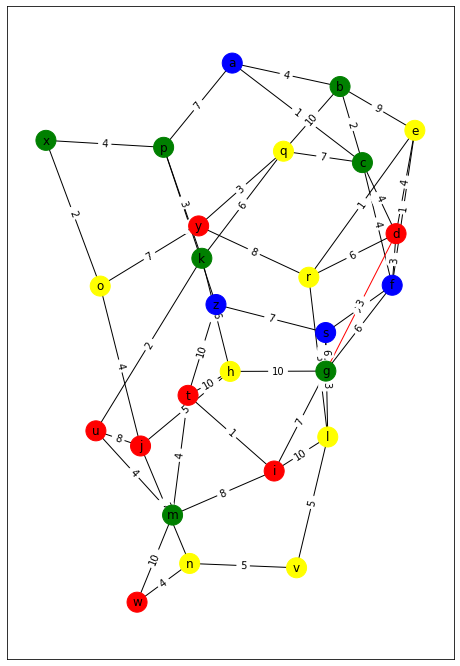

['a', 'c', 'd', 'g']
[('a', 'c'), ('c', 'd'), ('d', 'g')]


In [33]:
# Importa uma biblioteca para trabalhar com grafos 
import networkx as nx 

# Cria um grafo vazio
G = nx.Graph()

# Coloca os vértices, arestas e cores em uma lista

colors = ['blue', 'green', 'red', 'yellow']

vertices_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
                 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
                 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

pesos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

'''
vertices=[('a', {'color':random.choice(colors)}), 
          ('b', {'color':random.choice(colors)}), 
          ('c', {'color':random.choice(colors)}), 
          ('d', {'color':random.choice(colors)}),
          ('e', {'color':random.choice(colors)}),
          ('f', {'color':random.choice(colors)}),
          ('g', {'color':random.choice(colors)})]

arestas=[('a','b',{'weight': 2, 'feromonio': 0}),
         ('a','c',{'weight': 1, 'feromonio': 0}),
         ('b','c',{'weight': 1, 'feromonio': 0}),
         ('b','e',{'weight': 1, 'feromonio': 0}),
         ('c','f',{'weight': 10, 'feromonio': 0}),
         ('e','f',{'weight': 4, 'feromonio': 0}),
         ('f','g',{'weight': 2, 'feromonio': 0}),
         ('d','g',{'weight': 1, 'feromonio': 0}),
         ('c','d',{'weight': 4, 'feromonio': 0})                                         
        ]
'''

'''
vertices = []
arestas = []


# atribui uma cor aleatória para cada vertice
for vertice in vertices_names:
    vertices.append((random.choice(vertices_names), {'color': random.choice(colors)}))

   
# cria as arestas aleatoriamente
for aresta in range (0,500):
    arestas.append((random.choice(vertices_names), 
                   random.choice(vertices_names), 
                   {'weight': random.choice(pesos), 'feromonio': 0}))
'''

# atribui uma cor aleatória para cada vertice
for vertice in vertices_names:
    vertices.append((random.choice(vertices_names), {'color': random.choice(colors)}))
    
print(vertices)

arestas=[('a','b',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('a','c',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('b','c',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('b','e',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('c','f',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('e','f',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('f','g',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('d','g',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('c','d',{'weight': random.choice(pesos), 'feromonio': 0}),
         
         
         ('d','e',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('d','f',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('e','f',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('f','g',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('g','h',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('g','i',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('h','j',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('h','k',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('i','l',{'weight': random.choice(pesos), 'feromonio': 0}),
         
         ('i','m',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('j','n',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('j','o',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('k','p',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('k','q',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('l','r',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('l','s',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('m','t',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('m','u',{'weight': random.choice(pesos), 'feromonio': 0}),
         
         ('n','v',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('n','w',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('o','x',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('o','y',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('p','z',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('p','a',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('q','b',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('q','c',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('r','d',{'weight': random.choice(pesos), 'feromonio': 0}),
         
         ('r','e',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('s','f',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('s','g',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('t','h',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('t','i',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('u','j',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('u','k',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('v','l',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('w','m',{'weight': random.choice(pesos), 'feromonio': 0}),
         
         ('w','n',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('x','o',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('x','p',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('y','q',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('y','r',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('z','s',{'weight': random.choice(pesos), 'feromonio': 0}),
         ('z','t',{'weight': random.choice(pesos), 'feromonio': 0})        
        ]
    





# Coloca os vértices e arestas no grafo usando as listas
G.add_nodes_from(vertices)
G.add_edges_from(arestas)

# Descobre o caminho de custo mínimo (ccm) do vértice 'a' até 'g' 
ccm = nx.dijkstra_path(G,source = 'a', target = 'g')

# Mostra a sequência de vértices do caminho mínimo
print('Caminho de custo mínimo: ',ccm)

# Mostra qual o tamanho do caminho
print('Tamanho do caminho de custo mínimo: ',nx.dijkstra_path_length(G,'a','g'))

###### exibir grafo

# Importa uma biblioteca para gerar figuras e gráficos
import matplotlib.pyplot as plt

plt.figure(figsize=(8,12))

# Guarda os pesos de cada aresta em um dicionário
pesos = nx.get_edge_attributes(G,'weight')

# Guarda as cores de cada nó do grafo
g_colors = nx.get_node_attributes(G,'color')

colors = []
for node in g_colors:
    colors.append(g_colors[node])

# Separa as arestas que fazem parte do menor caminho e guarda em arestas_vermelhas
arestas_vermelhas = list(zip(ccm,ccm[1:]))

# Marca os vértices que estão no CCM para serem pintados de azul e os outros de branco
cor_vertices = ['yellow' if not node in ccm else 'green' for node in G.nodes()]

# Marca as arestas que estão no CCM para serem pintados de vermelho e as outras de preto
cor_arestas = ['black' if not edge in arestas_vermelhas else 'red' for edge in G.edges()]

# Calcula automaticamente a posição de cada vértice 
# Note que as posições mudam de uma execução para a outra, dá para fazer diferente
# e fixar cada posição

pos=nx.spring_layout(G) 

# Prepara os vértices para serem desenhados usando as cores pré-determinadas e o tamanho 400
nx.draw_networkx(G, pos,node_color= colors,edge_color= cor_arestas, node_size=400)

# Preparar para mostrar os pesos de cada aresta (sem isso mostra apenas as linhas)
nx.draw_networkx_edge_labels(G, pos, edge_labels=pesos)


# Mostra o grafo
plt.show()

print(ccm)
print(arestas_vermelhas)

In [34]:
vertices

[('f', {'color': 'green'}),
 ('t', {'color': 'blue'}),
 ('z', {'color': 'green'}),
 ('b', {'color': 'yellow'}),
 ('i', {'color': 'green'}),
 ('i', {'color': 'green'}),
 ('j', {'color': 'blue'}),
 ('o', {'color': 'green'}),
 ('r', {'color': 'yellow'}),
 ('t', {'color': 'blue'}),
 ('z', {'color': 'green'}),
 ('f', {'color': 'yellow'}),
 ('i', {'color': 'blue'}),
 ('x', {'color': 'green'}),
 ('z', {'color': 'red'}),
 ('y', {'color': 'yellow'}),
 ('d', {'color': 'yellow'}),
 ('l', {'color': 'red'}),
 ('x', {'color': 'yellow'}),
 ('j', {'color': 'blue'}),
 ('y', {'color': 'blue'}),
 ('x', {'color': 'red'}),
 ('j', {'color': 'blue'}),
 ('v', {'color': 'red'}),
 ('c', {'color': 'red'}),
 ('t', {'color': 'green'}),
 ('a', {'color': 'green'}),
 ('f', {'color': 'yellow'}),
 ('d', {'color': 'blue'}),
 ('w', {'color': 'green'}),
 ('p', {'color': 'yellow'}),
 ('w', {'color': 'yellow'}),
 ('x', {'color': 'blue'}),
 ('r', {'color': 'blue'}),
 ('o', {'color': 'green'}),
 ('v', {'color': 'yellow'}),
 (

# ACO (Implementação Manual - considerar cores)

In [31]:
num_ants = 6
taxa_evaporação = 3
max_iteracoes = 100
iteracao = 0
source = 'a'
target = 'w'
solutions = []

feromonios = nx.get_edge_attributes(G,'feromonio')
pesos = nx.get_edge_attributes(G,'weight')
visitados = []
colors_visited = []

def atualiza_trilha_feromonio():
    print('atualiza feromonio...')

def atualiza_solucoes():
    ant = {'caminho':[], custo: 0, cores:['blue', 'blue', 'red', 'green']}

def escolhe_proximo_no(vizinhos, start_node, colors):
    
    no_escolhido_peso = 999
    no_escolhido_feromonio = -1
    
    # faz busca aleatória
    try:
        vizinhos = dict(vizinhos)
        vizinho_aleatorio = list(vizinhos.keys())
        #print(f'esses são os vizinhos: {list(vizinhos.keys())}')
        # remover nos visitados da lista e seleciona um vizinho aleatorio  
        vizinho_aleatorio = list(set(vizinho_aleatorio) - set(visitados))
        vizinho_aleatorio = random.choice(vizinho_aleatorio)
        visitados.append(vizinho_aleatorio)

        #print(f'visitados: {visitados}')
        return vizinho_aleatorio, colors[vizinho_aleatorio], int(vizinhos[vizinho_aleatorio]['weight']), 'valid'
    except:
        #print('entrou em um circuito! solução inválida')
        return 'w', colors['w'], 999, 'invalid'
    
    '''
    if(vizinho_aleatorio not in visitados):
        visitados.append(vizinho_aleatorio)
        return vizinho_aleatorio
    return random.choice(list(vizinhos.keys()))
    '''
    
    '''
    # essa solucao comentada retorna o menor caminho e nao considera muito bem as cores
    for node in vizinhos:
        peso = int(vizinhos[node]['weight'])
        feromonio = int(vizinhos[node]['feromonio'])
        #print(f'peso: {peso} and feromonio: {feromonio}')
        
        print(f'atual node: {node}')
        print(f'cor do node atual: {colors[node]}')
        print(f'visitados: {visitados}')
        print(f'cores visitadas: {colors_visited}')
        
        if(node not in visitados):
            if(peso < no_escolhido_peso or feromonio > no_escolhido_feromonio or colors[node] not in colors_visited):
            #if(colors[node] not in colors_visited):
                print(f'if2, node:{node}, color node: {colors[node]}, visited_colors: {colors_visited}')
                no_escolhido = node
                no_escolhido_peso = peso
                no_escolhido_feromonio = feromonio
            else:
                no_escolhido = node
                no_escolhido_peso = peso
                no_escolhido_feromonio = feromonio
            #marca o no como visitado
            visitados.append(node)
            #adiciona a cor na lista de cores visitadas
            colors_visited.append(colors[node])

    return no_escolhido
    '''

# a formiga parte da colônia e vai até o destino (voltando pelo mesmo caminho e atualizando a trilha de feromônios)  
def busca_caminho():
    #print('busca caminho...')
    
    caminho = []
    custo = 0
    cores_visitadas = []
    
    #nodes = list(G.nodes())
    start_node = 'a'
    final_node = 'w'
    #print(f'start_node: {start_node}')
    
    # encontrar vizinhos do nó inicial
    vizinhos = G[start_node]
    #print(vizinhos)
    
    # encontrar cores de todos os nós
    colors = nx.get_node_attributes(G, "color")
    #print(colors)
    
    # inicializar variaveis com os valores do ponto inicial (colonia)
    no_escolhido = start_node
    caminho.append(start_node)
    visitados.append(start_node)
    #colors_visited.append(colors[start_node])
    cores_visitadas.append(colors[start_node])
    
    while(no_escolhido != final_node):
        
        no_escolhido, cor, peso, status = escolhe_proximo_no(vizinhos, start_node, colors)
        
        cores_visitadas.append(cor)
        custo = custo + peso
        
        #print(f'no_escolhido: {no_escolhido}')
        vizinhos = G[no_escolhido]
        caminho.append(no_escolhido)
        #print(f'caminho: {caminho}')
    
    #adicionar solução no conjunto
    solution = {} 
    solution['caminho'] = caminho
    solution['custo'] = custo
    solution['cores'] = cores_visitadas
    solution['status'] = status 
    #print(f'solução: {solution}\n')
    
    # limpar trilha de visitados
    del visitados[:]
    visitados.append(start_node)
    
    return solution

for i in range(0,10000):
    solution = busca_caminho()
    solutions.append(solution)

print(solutions)

[{'caminho': ['a', 'p', 'z', 's', 'f', 'e', 'r', 'd', 'c', 'b', 'q', 'k', 'h', 'g', 'i', 'm', 'u', 'j', 'n', 'v', 'l', 'w'], 'custo': 1104, 'cores': ['yellow', 'yellow', 'blue', 'blue', 'green', 'green', 'blue', 'red', 'blue', 'blue', 'yellow', 'blue', 'blue', 'red', 'yellow', 'blue', 'yellow', 'green', 'green', 'yellow', 'red', 'red'], 'status': 'invalid'}, {'caminho': ['a', 'p', 'z', 't', 'h', 'g', 'i', 'm', 'w'], 'custo': 32, 'cores': ['yellow', 'yellow', 'blue', 'yellow', 'blue', 'red', 'yellow', 'blue', 'red'], 'status': 'valid'}, {'caminho': ['a', 'c', 'b', 'q', 'k', 'h', 'g', 'f', 'd', 'e', 'r', 'y', 'o', 'j', 'n', 'w'], 'custo': 96, 'cores': ['yellow', 'blue', 'blue', 'yellow', 'blue', 'blue', 'red', 'green', 'red', 'green', 'blue', 'green', 'red', 'green', 'green', 'red'], 'status': 'valid'}, {'caminho': ['a', 'b', 'c', 'q', 'k', 'p', 'z', 't', 'm', 'u', 'j', 'n', 'w'], 'custo': 66, 'cores': ['yellow', 'blue', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'yell

In [73]:
def find_best_solution():
    min_custo = 9999
    max_cores = -1
    best_ant = None

    for ant in solutions:
        if(ant['custo'] <= min_custo and len(set(ant['cores']))>= max_cores and ant['status'] == 'valid'):
            best_ant = ant
            min_custo = ant['custo']
            max_cores = len(set(ant['cores']))

    return best_ant

best_ant = find_best_solution()
print(best_ant)

{'caminho': ['a', 'p', 'z', 't', 'm', 'w'], 'custo': 18, 'cores': ['yellow', 'green', 'blue', 'red', 'yellow', 'blue'], 'status': 'valid'}


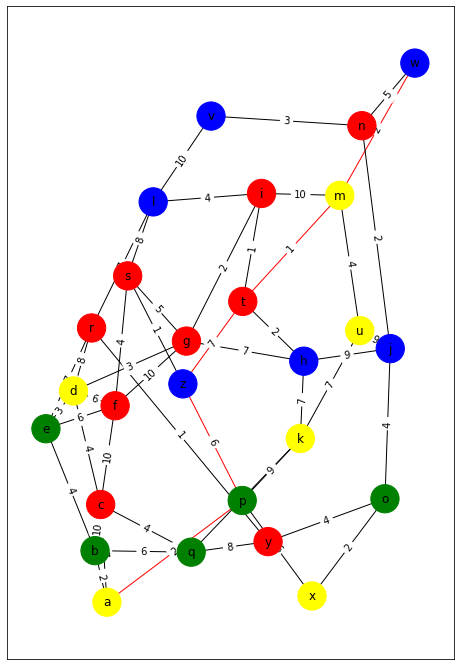

{'caminho': ['a', 'p', 'z', 't', 'm', 'w'], 'custo': 18, 'cores': ['yellow', 'green', 'blue', 'red', 'yellow', 'blue'], 'status': 'valid'}


In [74]:
###### exibir grafo

# Importa uma biblioteca para gerar figuras e gráficos
import matplotlib.pyplot as plt

plt.figure(figsize=(8,12))

# Guarda os pesos de cada aresta em um dicionário
pesos = nx.get_edge_attributes(G,'weight')

# Guarda as cores de cada nó do grafo
g_colors = nx.get_node_attributes(G,'color')

colors = []
for node in g_colors:
    colors.append(g_colors[node])

# Separa as arestas que fazem parte do menor caminho e guarda em arestas_vermelhas
best_path = best_ant['caminho']
arestas_vermelhas = list(zip(best_path,best_path[1:]))

# Marca os vértices que estão no CCM para serem pintados de azul e os outros de branco
#cor_vertices = ['yellow' if not node in best_path else 'green' for node in G.nodes()]

# Marca as arestas que estão no CCM para serem pintados de vermelho e as outras de preto
cor_arestas = ['black' if not edge in arestas_vermelhas and not tuple(reversed(edge)) in arestas_vermelhas else 'red' for edge in G.edges()]

# Calcula automaticamente a posição de cada vértice 
# Note que as posições mudam de uma execução para a outra, dá para fazer diferente
# e fixar cada posição

pos=nx.spring_layout(G) 

# Prepara os vértices para serem desenhados usando as cores pré-determinadas e o tamanho 800
nx.draw_networkx(G, pos,node_color= colors,edge_color= cor_arestas, node_size=800)

# Preparar para mostrar os pesos de cada aresta (sem isso mostra apenas as linhas)
nx.draw_networkx_edge_labels(G, pos, edge_labels=pesos)


# Mostra o grafo
plt.show()

print(best_ant)

In [75]:
solutions

[{'caminho': ['a',
   'c',
   'f',
   'g',
   's',
   'l',
   'i',
   't',
   'z',
   'p',
   'x',
   'o',
   'y',
   'q',
   'b',
   'e',
   'd',
   'r',
   'w'],
  'custo': 1098,
  'cores': ['yellow',
   'red',
   'red',
   'red',
   'red',
   'blue',
   'red',
   'red',
   'blue',
   'green',
   'yellow',
   'green',
   'red',
   'green',
   'green',
   'green',
   'yellow',
   'red',
   'blue'],
  'status': 'invalid'},
 {'caminho': ['a', 'b', 'q', 'c', 'd', 'g', 'h', 'j', 'n', 'w'],
  'custo': 42,
  'cores': ['yellow',
   'green',
   'green',
   'red',
   'yellow',
   'red',
   'blue',
   'blue',
   'red',
   'blue'],
  'status': 'valid'},
 {'caminho': ['a', 'b', 'q', 'k', 'u', 'j', 'o', 'x', 'p', 'z', 't', 'm', 'w'],
  'custo': 55,
  'cores': ['yellow',
   'green',
   'green',
   'yellow',
   'yellow',
   'blue',
   'green',
   'yellow',
   'green',
   'blue',
   'red',
   'yellow',
   'blue'],
  'status': 'valid'},
 {'caminho': ['a',
   'p',
   'z',
   's',
   'g',
   'f',
   'c'